# **Title: Anomaly Detection for Energy Usage Optimization**



#**Problem Statement:**


The project aims to develop an anomaly detection model to predict whether the energy usage in a building is anomalous or not. The significance of this project lies in the fact that anomalous energy usage implies energy wastage, which can have both environmental and economic implications. By identifying and addressing such instances, we can significantly contribute to energy conservation and cost reduction.

# **Dataset Description**

**train.csv**

*building_id* - Unique building id code.

*timestamp* - When the measurement was taken

*meter_reading*- Electricity consumption in kWh.

*anomaly* - Whether this reading is anomalous (1) or not (0).

In [ ]:
!pip install pyspark

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, split, substring, when
from pyspark.sql.types import IntegerType
from datetime import datetime

In [ ]:
spark = SparkSession.builder.appName("EnergyAnomalyDetection").getOrCreate()

train = spark.read.csv('/content/Anomaly.csv', header=True, inferSchema=True)

train.show()

+-----------+-------------------+-------------+-------+
|building_id|          timestamp|meter_reading|anomaly|
+-----------+-------------------+-------------+-------+
|          1|2016-01-01 00:00:00|         NULL|      0|
|         32|2016-01-01 00:00:00|         NULL|      0|
|         41|2016-01-01 00:00:00|         NULL|      0|
|         55|2016-01-01 00:00:00|         NULL|      0|
|         69|2016-01-01 00:00:00|         NULL|      0|
|         79|2016-01-01 00:00:00|         NULL|      0|
|         82|2016-01-01 00:00:00|         NULL|      0|
|         91|2016-01-01 00:00:00|         NULL|      0|
|        107|2016-01-01 00:00:00|      175.184|      1|
|        108|2016-01-01 00:00:00|         NULL|      0|
|        111|2016-01-01 00:00:00|      167.392|      1|
|        112|2016-01-01 00:00:00|       10.275|      0|
|        117|2016-01-01 00:00:00|       16.306|      0|
|        118|2016-01-01 00:00:00|        117.2|      0|
|        119|2016-01-01 00:00:00|      219.204| 

In [ ]:
print("Shape:", (train.count(), len(train.columns)))

Shape: (1749494, 4)


In [ ]:
train.select([col(c).alias(c) for c in train.columns]).na.fill(0).show()

+-----------+-------------------+-------------+-------+
|building_id|          timestamp|meter_reading|anomaly|
+-----------+-------------------+-------------+-------+
|          1|2016-01-01 00:00:00|          0.0|      0|
|         32|2016-01-01 00:00:00|          0.0|      0|
|         41|2016-01-01 00:00:00|          0.0|      0|
|         55|2016-01-01 00:00:00|          0.0|      0|
|         69|2016-01-01 00:00:00|          0.0|      0|
|         79|2016-01-01 00:00:00|          0.0|      0|
|         82|2016-01-01 00:00:00|          0.0|      0|
|         91|2016-01-01 00:00:00|          0.0|      0|
|        107|2016-01-01 00:00:00|      175.184|      1|
|        108|2016-01-01 00:00:00|          0.0|      0|
|        111|2016-01-01 00:00:00|      167.392|      1|
|        112|2016-01-01 00:00:00|       10.275|      0|
|        117|2016-01-01 00:00:00|       16.306|      0|
|        118|2016-01-01 00:00:00|        117.2|      0|
|        119|2016-01-01 00:00:00|      219.204| 

In [ ]:
train = train.withColumn("new", split(train["timestamp"], " "))
train = train.withColumn("date", col("new")[0])
train = train.withColumn("time", substring(col("new")[1], 0, 2).cast(IntegerType()))
train = train.drop("new", "timestamp")
train.show()

+-----------+-------------+-------+----------+----+
|building_id|meter_reading|anomaly|      date|time|
+-----------+-------------+-------+----------+----+
|          1|         NULL|      0|2016-01-01|   0|
|         32|         NULL|      0|2016-01-01|   0|
|         41|         NULL|      0|2016-01-01|   0|
|         55|         NULL|      0|2016-01-01|   0|
|         69|         NULL|      0|2016-01-01|   0|
|         79|         NULL|      0|2016-01-01|   0|
|         82|         NULL|      0|2016-01-01|   0|
|         91|         NULL|      0|2016-01-01|   0|
|        107|      175.184|      1|2016-01-01|   0|
|        108|         NULL|      0|2016-01-01|   0|
|        111|      167.392|      1|2016-01-01|   0|
|        112|       10.275|      0|2016-01-01|   0|
|        117|       16.306|      0|2016-01-01|   0|
|        118|        117.2|      0|2016-01-01|   0|
|        119|      219.204|      0|2016-01-01|   0|
|        121|        229.0|      0|2016-01-01|   0|
|        136

In [ ]:
from pyspark.sql.functions import mean
numeric_columns = [col_name for col_name, data_type in train.dtypes if data_type in ['double', 'float', 'int']]
mean_values = train.select([mean(col(column)).alias(column) for column in numeric_columns]).collect()[0].asDict()

for column in numeric_columns:
    train = train.withColumn(column, when(col(column).isNull(), mean_values[column]).otherwise(col(column)))

train.show()

+-----------+------------------+-------+----------+----+
|building_id|     meter_reading|anomaly|      date|time|
+-----------+------------------+-------+----------+----+
|        1.0|179.90183767127465|    0.0|2016-01-01| 0.0|
|       32.0|179.90183767127465|    0.0|2016-01-01| 0.0|
|       41.0|179.90183767127465|    0.0|2016-01-01| 0.0|
|       55.0|179.90183767127465|    0.0|2016-01-01| 0.0|
|       69.0|179.90183767127465|    0.0|2016-01-01| 0.0|
|       79.0|179.90183767127465|    0.0|2016-01-01| 0.0|
|       82.0|179.90183767127465|    0.0|2016-01-01| 0.0|
|       91.0|179.90183767127465|    0.0|2016-01-01| 0.0|
|      107.0|           175.184|    1.0|2016-01-01| 0.0|
|      108.0|179.90183767127465|    0.0|2016-01-01| 0.0|
|      111.0|           167.392|    1.0|2016-01-01| 0.0|
|      112.0|            10.275|    0.0|2016-01-01| 0.0|
|      117.0|            16.306|    0.0|2016-01-01| 0.0|
|      118.0|             117.2|    0.0|2016-01-01| 0.0|
|      119.0|           219.204

In [ ]:
train = train.withColumn("month", substring(col("date"), 6, 2).cast(IntegerType()))
train = train.withColumn("day", substring(col("date"), -2, 2).cast(IntegerType()))
train = train.drop("date")

train.show()

+-----------+------------------+-------+----+-----+---+
|building_id|     meter_reading|anomaly|time|month|day|
+-----------+------------------+-------+----+-----+---+
|        1.0|179.90183767127465|    0.0| 0.0|    1|  1|
|       32.0|179.90183767127465|    0.0| 0.0|    1|  1|
|       41.0|179.90183767127465|    0.0| 0.0|    1|  1|
|       55.0|179.90183767127465|    0.0| 0.0|    1|  1|
|       69.0|179.90183767127465|    0.0| 0.0|    1|  1|
|       79.0|179.90183767127465|    0.0| 0.0|    1|  1|
|       82.0|179.90183767127465|    0.0| 0.0|    1|  1|
|       91.0|179.90183767127465|    0.0| 0.0|    1|  1|
|      107.0|           175.184|    1.0| 0.0|    1|  1|
|      108.0|179.90183767127465|    0.0| 0.0|    1|  1|
|      111.0|           167.392|    1.0| 0.0|    1|  1|
|      112.0|            10.275|    0.0| 0.0|    1|  1|
|      117.0|            16.306|    0.0| 0.0|    1|  1|
|      118.0|             117.2|    0.0| 0.0|    1|  1|
|      119.0|           219.204|    0.0| 0.0|   

In [ ]:
from pyspark.sql.functions import udf
import pyspark.sql.functions as F
@udf(IntegerType())
def weekend_or_weekday_udf(year, month, day):
    try:
        d = datetime(year, month, day)
        if d.weekday() > 4:
            return 1
        else:
            return 0
    except ValueError:
        return None

train = train.withColumn("weekend", weekend_or_weekday_udf(F.lit(2016), col("month"), col("day")))


train = train.withColumn("weekend", when(col("weekend").isNull(), 0).otherwise(col("weekend")))

train.show()

+-----------+------------------+-------+----+-----+---+-------+
|building_id|     meter_reading|anomaly|time|month|day|weekend|
+-----------+------------------+-------+----+-----+---+-------+
|        1.0|179.90183767127465|    0.0| 0.0|    1|  1|      0|
|       32.0|179.90183767127465|    0.0| 0.0|    1|  1|      0|
|       41.0|179.90183767127465|    0.0| 0.0|    1|  1|      0|
|       55.0|179.90183767127465|    0.0| 0.0|    1|  1|      0|
|       69.0|179.90183767127465|    0.0| 0.0|    1|  1|      0|
|       79.0|179.90183767127465|    0.0| 0.0|    1|  1|      0|
|       82.0|179.90183767127465|    0.0| 0.0|    1|  1|      0|
|       91.0|179.90183767127465|    0.0| 0.0|    1|  1|      0|
|      107.0|           175.184|    1.0| 0.0|    1|  1|      0|
|      108.0|179.90183767127465|    0.0| 0.0|    1|  1|      0|
|      111.0|           167.392|    1.0| 0.0|    1|  1|      0|
|      112.0|            10.275|    0.0| 0.0|    1|  1|      0|
|      117.0|            16.306|    0.0|

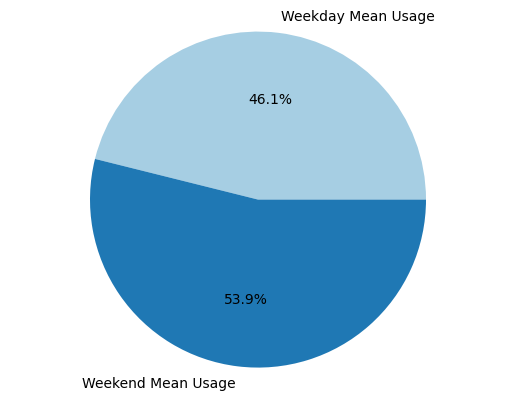

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean
import numpy as np

data = train.groupBy('weekend').agg(mean('meter_reading').alias('mean_meter_reading')).collect()

weekend_mean = data[1]['mean_meter_reading']
weekday_mean = data[0]['mean_meter_reading']

labels = ['Weekday Mean Usage', 'Weekend Mean Usage']
sizes = [weekday_mean, weekend_mean]
colors = plt.cm.Paired(np.arange(len(labels)))

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')

plt.show()


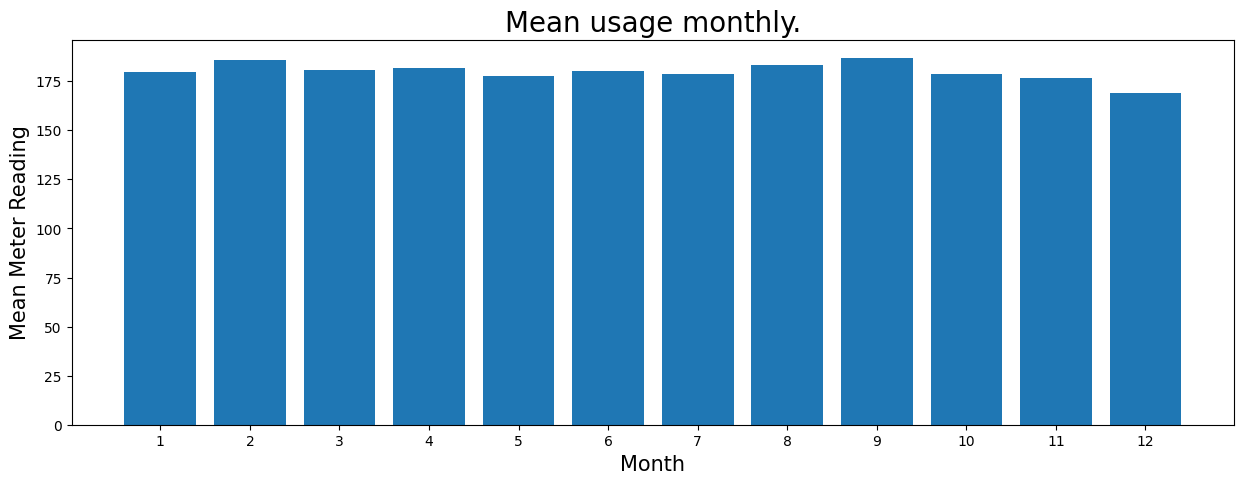

In [ ]:
data = train.groupBy('month').agg(mean('meter_reading').alias('mean_meter_reading')).collect()

months = [row['month'] for row in data]
mean_readings = [row['mean_meter_reading'] for row in data]

plt.figure(figsize=(15, 5))
plt.bar(months, mean_readings)
plt.title('Mean usage monthly.', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Mean Meter Reading', fontsize=15)
plt.xticks(months)
plt.show()

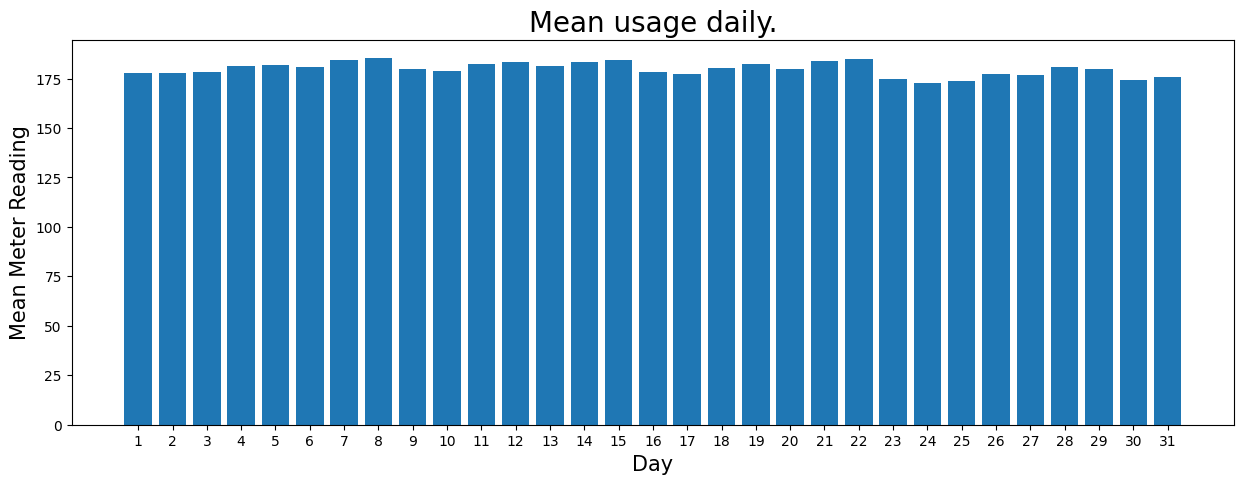

In [ ]:
data = train.groupBy('day').agg(mean('meter_reading').alias('mean_meter_reading')).collect()

days = [row['day'] for row in data]
mean_readings = [row['mean_meter_reading'] for row in data]

plt.figure(figsize=(15, 5))
plt.bar(days, mean_readings)
plt.title('Mean usage daily.', fontsize=20)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Mean Meter Reading', fontsize=15)
plt.xticks(days)
plt.show()

In [ ]:
neg = train.filter(train['anomaly'] == 0)
pos = train.filter(train['anomaly'] == 1)

neg_count = neg.count()
pos_count = pos.count()

print("Negative Shape:", neg_count)
print("Positive Shape:", pos_count)

Negative Shape: 1712198
Positive Shape: 37296


In [ ]:
train.show(5)

+-----------+------------------+-------+----+-----+---+-------+
|building_id|     meter_reading|anomaly|time|month|day|weekend|
+-----------+------------------+-------+----+-----+---+-------+
|        1.0|179.90183767127465|    0.0| 0.0|    1|  1|      0|
|       32.0|179.90183767127465|    0.0| 0.0|    1|  1|      0|
|       41.0|179.90183767127465|    0.0| 0.0|    1|  1|      0|
|       55.0|179.90183767127465|    0.0| 0.0|    1|  1|      0|
|       69.0|179.90183767127465|    0.0| 0.0|    1|  1|      0|
+-----------+------------------+-------+----+-----+---+-------+
only showing top 5 rows



In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier as SparkRandomForestClassifier
from pyspark.sql.types import IntegerType

inputColumns = ['building_id', 'meter_reading', 'time', 'month', 'day', 'weekend']
outputColumn = "anomaly"


for col_name in inputColumns:
    train = train.withColumn(col_name, train[col_name].cast(IntegerType()))

vector_assembler = VectorAssembler(inputCols=inputColumns, outputCol="features")

rf =SparkRandomForestClassifier(labelCol=outputColumn, featuresCol="features",numTrees=100)

stages = [vector_assembler, rf]
pipeline = Pipeline(stages=stages)


(train_df, test_df) = train.randomSplit([0.8, 0.2], seed=10)


pipeline_model = pipeline.fit(train_df)

predictions = pipeline_model.transform(test_df)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="anomaly")
accuracy = evaluator.evaluate(predictions)
print("Accuracy: ",accuracy)

Accuracy:  0.8011157104134183


In [ ]:
pipeline_model.write().overwrite().save("/content/trained_model")

In [ ]:
import gradio as gr
from pyspark.ml import PipelineModel
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator


loaded_model = PipelineModel.load("/content/trained_model")

def predict(building_id, meter_reading, time, month, day, weekend):

    user_input = spark.createDataFrame([(building_id, meter_reading, time, month, day, weekend)],
                                       ["building_id", "meter_reading", "time", "month", "day", "weekend"])


    input_columns = ["building_id", "meter_reading", "time", "month", "day", "weekend"]
    assembler = VectorAssembler(inputCols=input_columns, outputCol="features")
    user_input = assembler.transform(user_input)
    try:
      prediction_result = predictions.select("prediction").first()[0]
    except Exception as e:
      print("Error occurred during prediction:", e)
      prediction_result = None
    return prediction_result


iface = gr.Interface(fn=predict,
                     inputs=["number", "number", "number", "number", "number", "number"],
                     outputs="label")


iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1cc15f4fa79a22340d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
